In [72]:

import pandas as pd



In [73]:
df = pd.read_parquet('Assets/CombinedMiningData.parquet')
df = df.groupby(["Reserves & Resources As Of Date", "Primary Mineral"], as_index = False)["Primary Reserves and Resources"] \
        .agg("sum")


e = 'Cobalt'
df_cobalt = df[df['Primary Mineral'] == e]
df_cobalt.set_index('Reserves & Resources As Of Date', inplace=True)



In [74]:
data = (df_cobalt.resample('ME')
 
 .agg({'Primary Mineral': 'first','Primary Reserves and Resources': 'sum'})
 
 .replace(0, None)
 .fillna({'Primary Mineral': e})
 .infer_objects(copy=False)
 .interpolate(method='linear', limit_direction='both')
)

data

/var/folders/n3/kkhdszw97tl8hc30cbvg04140000gn/T/ipykernel_12758/4248180102.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .interpolate(method='linear', limit_direction='both')


,Primary Mineral,Primary Reserves and Resources
Reserves & Resources As Of Date,,
2010-02-28,Cobalt,920.0
2010-03-31,Cobalt,9795.0
2010-04-30,Cobalt,18670.0
2010-05-31,Cobalt,9608.0
2010-06-30,Cobalt,546.0
...,...,...
2024-08-31,Cobalt,316353.0
2024-09-30,Cobalt,52000.0
2024-10-31,Cobalt,1449.0


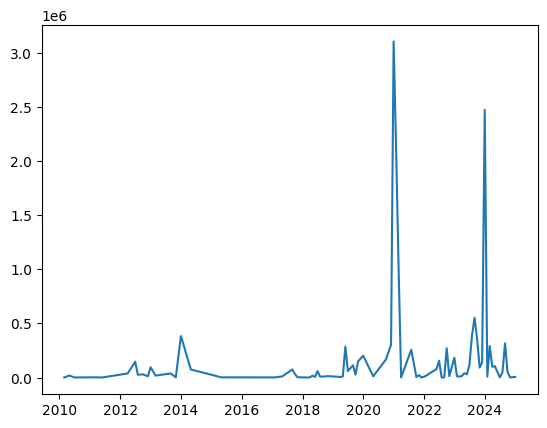

In [75]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


f = sm.tsa.ExponentialSmoothing(data["Primary Reserves and Resources"], trend='additive', seasonal='multiplicative') \
        .fit(optimized=False, smoothing_level=1, smoothing_trend=0.3, smoothing_seasonal=0.1)

plt.plot(data["Primary Reserves and Resources"], label='Original Data')
# plt.plot(f.fittedvalues)
# plt.plot(f.forecast(12*3), label='Forecast', linestyle='--')
plt.show()